In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

In [62]:
data = pd.read_csv('loan.csv')
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


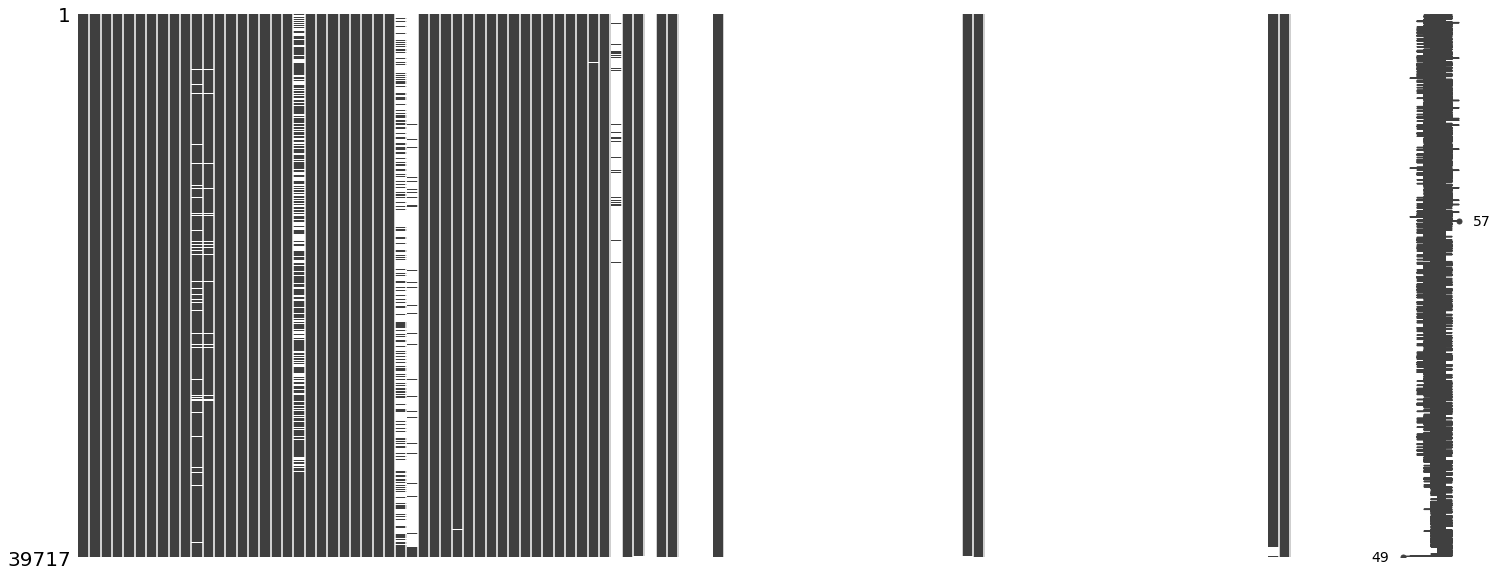

In [63]:
msno.matrix(data)

In [64]:
data.isnull().mean()*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [65]:
miss_list = (list(data.isnull().mean()*100))
miss_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.191303472064859,
 2.7066495455346575,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 32.58050708764509,
 0.0,
 0.027695948838029054,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 64.66248709620565,
 92.98537150338646,
 0.0,
 0.0,
 0.0,
 0.12589067653649572,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1787647606818239,
 0.0,
 97.12969257496789,
 0.0050356270614598285,
 0.1409975577208752,
 100.0,
 0.0,
 0.0,
 100.0,
 100.0,
 100.0,
 0.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 0.1409975577208752,
 0.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 1.7549160309187504,
 0.09819472769846666,
 100.0,
 100.0,
 100.0,
 100.0]

In [66]:
new = []
for idx, val in enumerate(miss_list):
    if val > 30.0:
        new.append(idx)

print(new)

[19, 28, 29, 47, 50, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 107, 108, 109, 110]


In [67]:
data.drop(data.iloc[:, new], axis = 1, inplace = True)

In [68]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


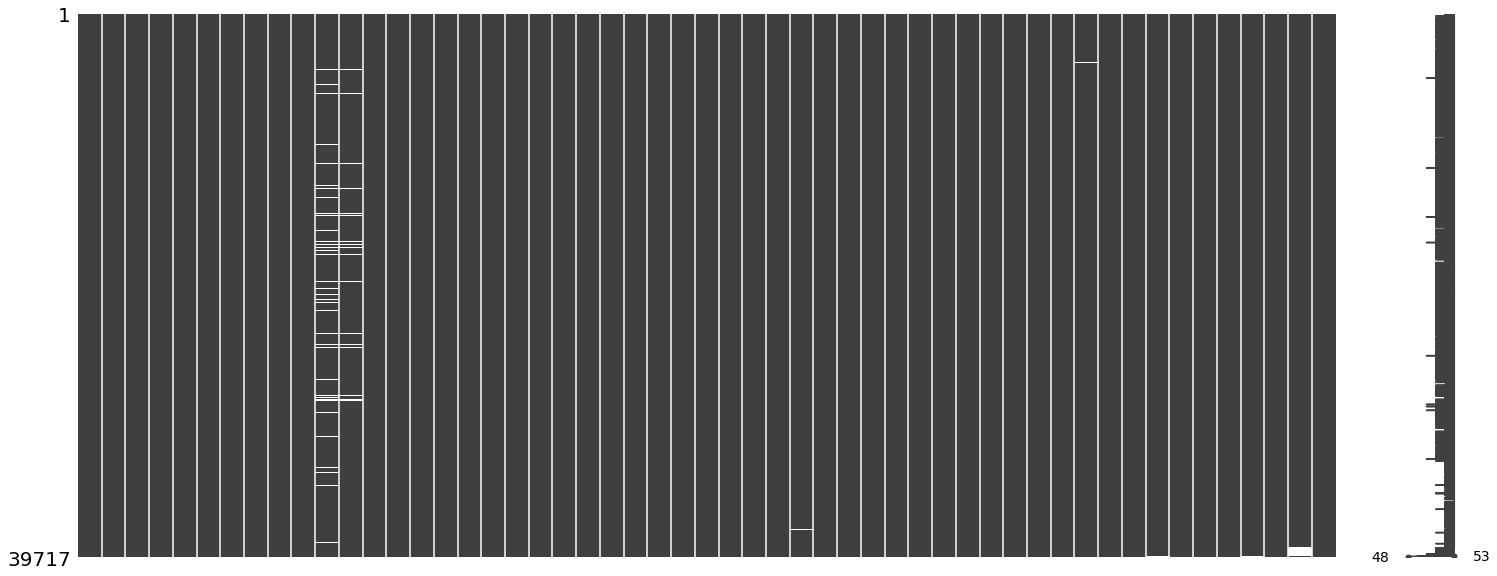

In [69]:
msno.matrix(data)

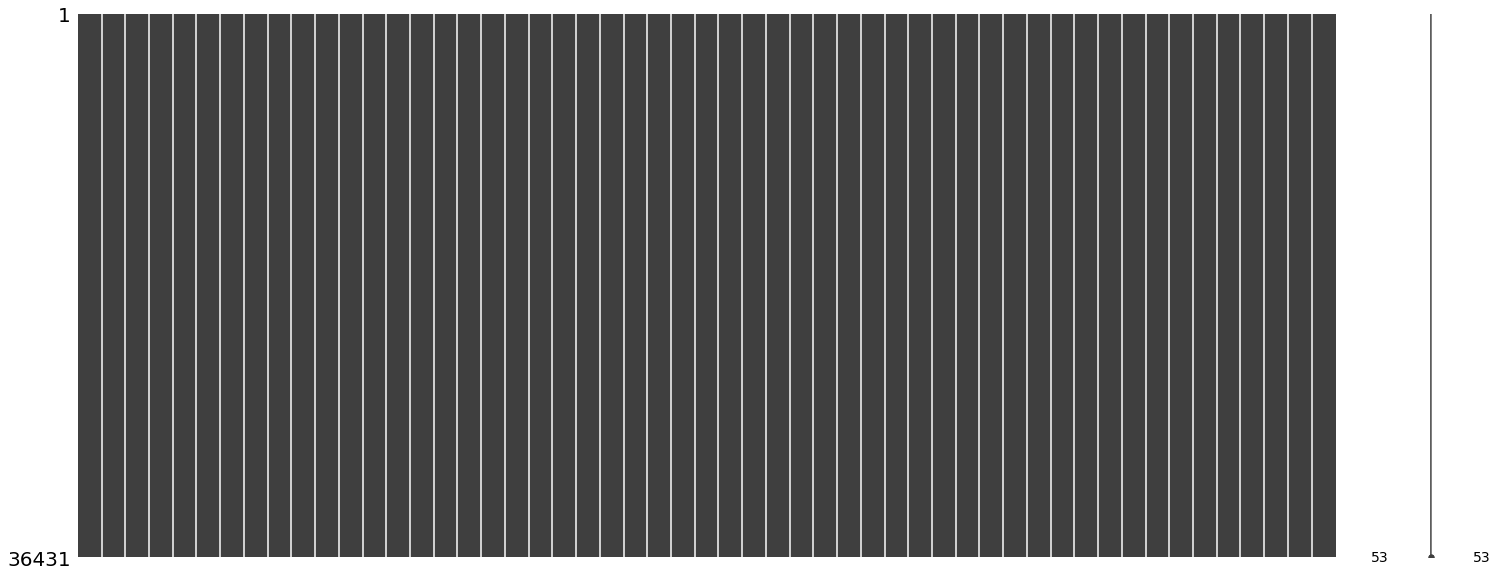

In [70]:
data.dropna(axis = 0, inplace = True)
msno.matrix(data)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 53 columns):
id                            36431 non-null int64
member_id                     36431 non-null int64
loan_amnt                     36431 non-null int64
funded_amnt                   36431 non-null int64
funded_amnt_inv               36431 non-null float64
term                          36431 non-null object
int_rate                      36431 non-null object
installment                   36431 non-null float64
grade                         36431 non-null object
sub_grade                     36431 non-null object
emp_title                     36431 non-null object
emp_length                    36431 non-null object
home_ownership                36431 non-null object
annual_inc                    36431 non-null float64
verification_status           36431 non-null object
issue_d                       36431 non-null object
loan_status                   36431 non-null object
pymnt_pl

In [72]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,36431.0,691014.145535,202604.213310,55742.00,522689.000000,670575.000000,8.399035e+05,1.077430e+06
member_id,36431.0,861111.617276,253829.086278,114426.00,675543.000000,856976.000000,1.049794e+06,1.314167e+06
loan_amnt,36431.0,11307.794186,7433.904309,500.00,5600.000000,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,36431.0,11032.933491,7166.520054,500.00,5500.000000,10000.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,36431.0,10601.876895,7072.645601,0.00,5000.000000,9203.371902,1.450877e+04,3.500000e+04
installment,36431.0,326.187642,207.390058,16.08,168.900000,283.280000,4.322200e+02,1.305190e+03
annual_inc,36431.0,69306.938659,63543.763359,4000.00,42000.000000,60000.000000,8.300000e+04,6.000000e+06
dti,36431.0,13.444293,6.643417,0.00,8.360000,13.540000,1.869000e+01,2.999000e+01
delinq_2yrs,36431.0,0.146139,0.492211,0.00,0.000000,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,36431.0,0.864840,1.063383,0.00,0.000000,1.000000,1.000000e+00,8.000000e+00


In [73]:
for i in data.columns.to_list():
    print(data[i].value_counts())

1052670    1
460298     1
652820     1
509458     1
732687     1
1058318    1
867853     1
865804     1
663049     1
847383     1
595464     1
732561     1
685572     1
1068547    1
613889     1
742912     1
666196     1
623971     1
784580     1
986667     1
517686     1
587316     1
378418     1
646705     1
732719     1
802349     1
1056297    1
1017370    1
474797     1
621067     1
          ..
598833     1
994096     1
358545     1
1045291    1
403199     1
994128     1
754469     1
1028899    1
506658     1
500513     1
868166     1
744222     1
1014586    1
488251     1
871228     1
1000253    1
1006398    1
807743     1
582628     1
637762     1
741085     1
492357     1
891718     1
602710     1
387912     1
523082     1
705357     1
543704     1
1037135    1
380631     1
Name: id, Length: 36431, dtype: int64
745584     1
1066306    1
408909     1
409174     1
791880     1
617799     1
399824     1
740675     1
677184     1
1056997    1
1031485    1
891728     1
776702     1


Name: emp_title, Length: 28205, dtype: int64
10+ years    8407
2 years      4176
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64
RENT        17464
MORTGAGE    16298
OWN          2575
OTHER          94
Name: home_ownership, dtype: int64
60000.00     1367
50000.00      958
40000.00      800
45000.00      764
65000.00      758
75000.00      755
30000.00      722
70000.00      680
48000.00      643
55000.00      625
80000.00      623
42000.00      560
36000.00      543
90000.00      534
35000.00      473
85000.00      463
100000.00     457
72000.00      451
120000.00     436
52000.00      376
54000.00      350
24000.00      326
110000.00     301
95000.00      268
62000.00      247
78000.00      236
38000.00      217
25000.00      213
150000.00     210
58000.00      209
             ... 
17640.00        1
111549.00       1
47581.00        1
86964.0

May-16    1174
Mar-13     967
Dec-14     875
May-13     856
Feb-13     816
Mar-12     799
Aug-12     790
Apr-13     787
Oct-12     781
Mar-14     770
Aug-14     770
Jan-14     767
Jul-14     760
Oct-14     755
Jul-13     734
Feb-14     729
Dec-13     727
Sep-12     727
Jan-13     722
Jun-14     716
Jul-12     705
Feb-12     696
May-12     691
Aug-13     687
Apr-12     681
Nov-12     671
Jun-12     670
Dec-12     652
Jun-13     652
Oct-13     645
          ... 
Jul-10     145
May-15     139
Apr-15     130
Aug-10     121
Mar-10     115
Jun-10     102
Apr-10      95
May-10      94
Dec-09      72
Feb-10      62
Jan-10      61
Oct-09      49
Nov-09      46
Aug-09      37
Jul-09      31
Sep-09      30
Apr-09      30
May-09      28
Jun-09      28
Mar-09      23
Feb-09      19
Jan-09      10
Oct-08       8
Jul-08       7
Dec-08       5
May-08       5
Aug-08       5
Sep-08       5
Nov-08       4
Jun-08       2
Name: last_pymnt_d, Length: 97, dtype: int64
276.06      20
200.00      16
100.00    

In [75]:
to_drop =  [ 'id','funded_amnt', 'member_id','pymnt_plan', 'url', 'pub_rec', 'initial_list_status', 'out_prncp', 'out_prncp_inv',    
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',   'tax_liens']


In [76]:
data.drop(to_drop, axis = 1, inplace = True)

In [77]:
data.head(-20)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies
1,2500,2500.000000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,...,4,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13,0.0,0.0
3,10000,10000.000000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16,0.0,0.0
4,3000,3000.000000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,...,38,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,May-16,0.0,0.0
5,5000,5000.000000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,12,5632.210000,5632.21,5000.00,632.21,Jan-15,161.03,Jan-16,0.0,0.0
6,7000,7000.000000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,...,11,10110.840000,10110.84,6985.61,3125.23,May-16,1313.76,May-16,0.0,0.0
7,3000,3000.000000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,...,4,3939.135294,3939.14,3000.00,939.14,Jan-15,111.34,Dec-14,0.0,0.0
9,5375,5350.000000,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,...,3,1476.190000,1469.34,673.48,533.42,Nov-12,121.45,Mar-13,0.0,0.0
10,6500,6500.000000,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5 years,OWN,...,23,7678.017673,7678.02,6500.00,1178.02,Jun-13,1655.54,Dec-15,0.0,0.0
11,12000,12000.000000,36 months,12.69%,402.54,B,B5,UCLA,10+ years,OWN,...,34,13947.989160,13947.99,12000.00,1947.99,Sep-13,6315.30,Aug-13,0.0,0.0
12,9000,9000.000000,36 months,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,...,9,2270.700000,2270.70,1256.14,570.26,Jul-12,305.38,Nov-12,0.0,0.0


In [78]:
data.shape

(36431, 35)

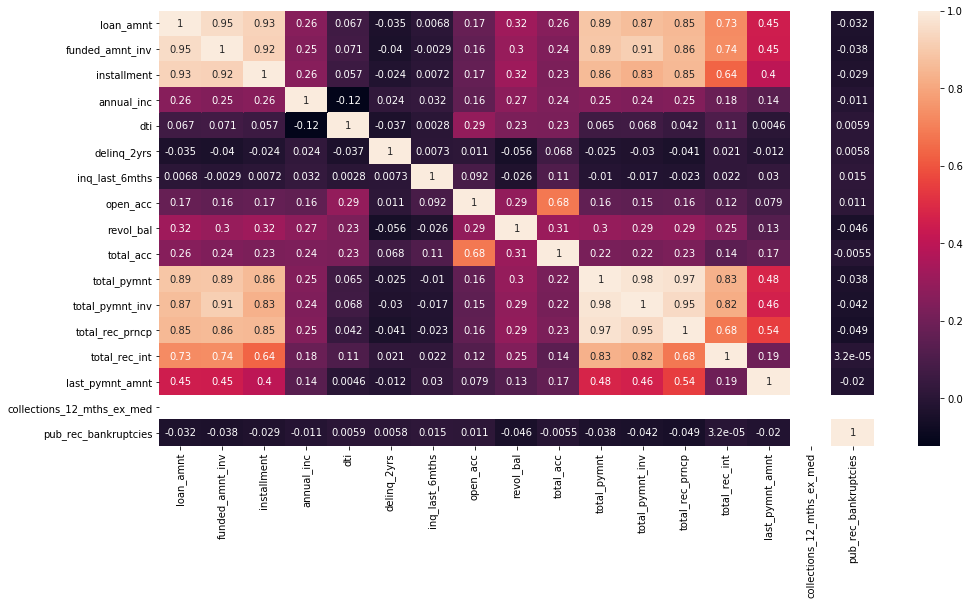

In [80]:
plt.figure(figsize = (16, 8))
sns.heatmap(data.corr(), annot = True)

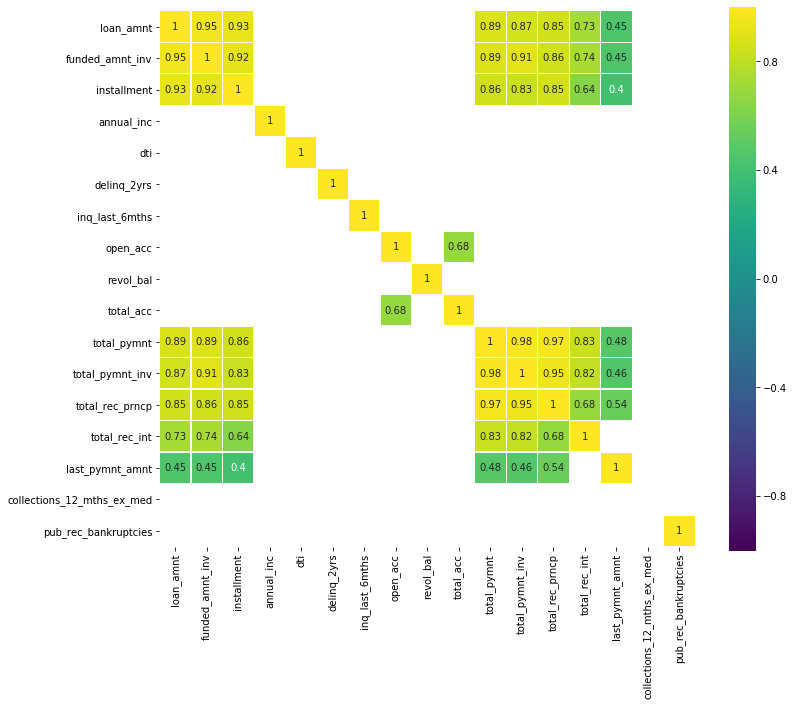

In [84]:
corr = data.corr()
# corr =corr.drop('count_log', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);